In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Load handwritten digits data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


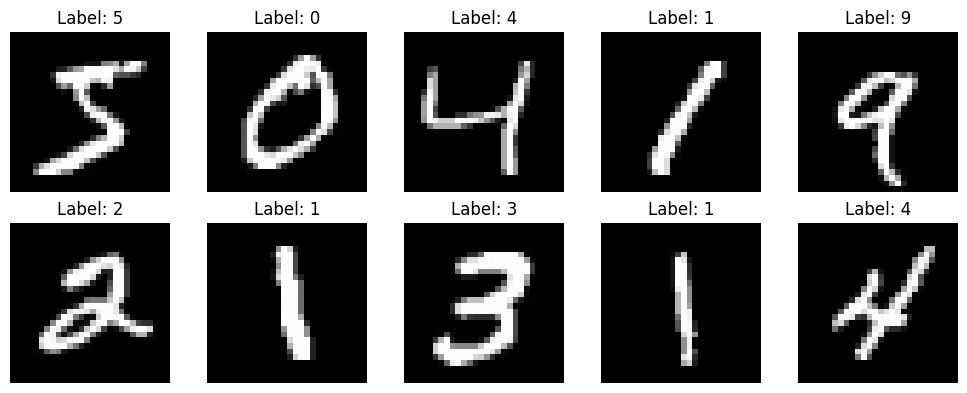

In [11]:
import matplotlib.pyplot as plt
# Show first 10 images from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
# Flatten the 28x28 images into a 1D array of 784 pixels
x_train = x_train.reshape((60000, 784)).astype("float32") / 255
x_test = x_test.reshape((10000, 784)).astype("float32") / 255

# Convert labels to categories (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [4]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
history=model.fit(x_train, y_train, epochs=5, batch_size=32,validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9936 - val_loss: 0.0166
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9933 - val_loss: 0.0202
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9942 - val_loss: 0.0185
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9972 - loss: 0.0077 - val_accuracy: 0.9929 - val_loss: 0.0228
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 0.9899 - val_loss: 0.0384


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1346
Test accuracy: 0.9768000245094299


In [21]:
import numpy as np

# Let's predict the first image in test data
predicted = model.predict(np.array([x_test[0]]))
print(f"Predicted label: {np.argmax(predicted)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted label: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


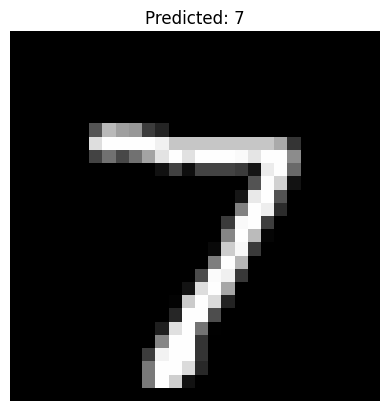

In [22]:
# Predict and show the digit
index = 0
prediction = model.predict(np.array([x_test[index]]))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction)}")
plt.axis('off')
plt.show()


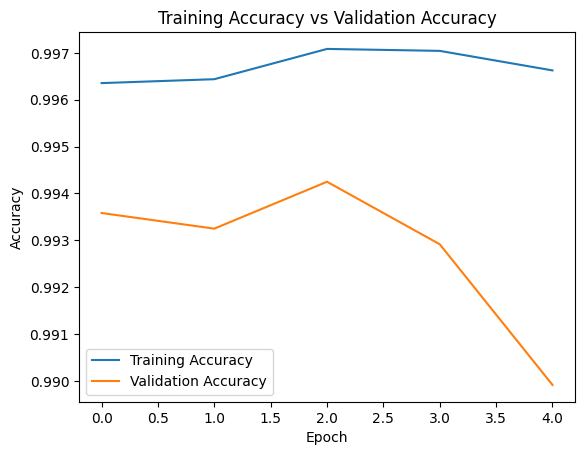

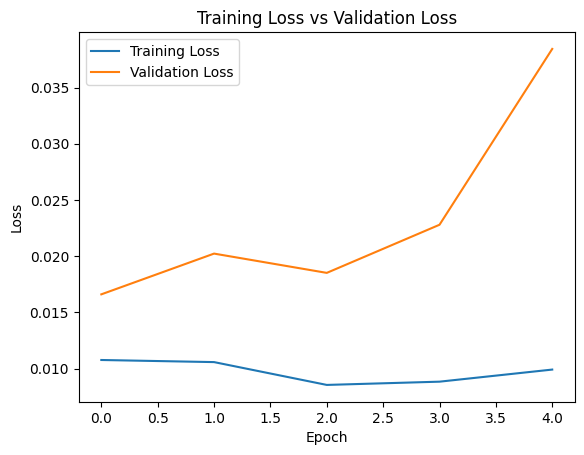

In [23]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()
